In [1]:
import numpy as np
import pandas as pd

In [2]:
N_cluster = 4
N_per_cluster = 500
separation = 10
width = 1

df = pd.DataFrame({
    "x": (
        separation * np.random.normal(size=(N_cluster, 1))
        + width * np.random.normal(size=(N_cluster, N_per_cluster))
    ).flatten(),
    "y": (
        separation * np.random.normal(size=(N_cluster, 1))
        + width * np.random.normal(size=(N_cluster, N_per_cluster))
    ).flatten(),
})

display(df.head(5))

,x,y
0,-3.392209,-7.656650
1,-5.117672,-11.876110
2,-4.685965,-8.875328
3,-3.538671,-9.982905
4,-4.767756,-9.949869


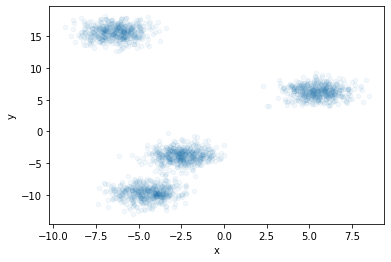

In [3]:
df.plot.scatter(x="x", y="y", alpha=0.05);

In [4]:
# %pip install sklearn

In [5]:
import sklearn.cluster

In [6]:
kmeans = sklearn.cluster.KMeans(n_clusters=4)

In [7]:
kmeans.fit(df)

KMeans(n_clusters=4)

In [8]:
df["cluster_id"] = kmeans.fit_predict(df)

In [9]:
df

,x,y,cluster_id
0,-3.392209,-7.656650,3
1,-5.117672,-11.876110,3
2,-4.685965,-8.875328,3
3,-3.538671,-9.982905,3
4,-4.767756,-9.949869,3
...,...,...,...
1995,6.849768,5.555387,2
1996,4.551589,5.787115,2
1997,4.700302,7.613435,2
1998,5.479330,5.546635,2


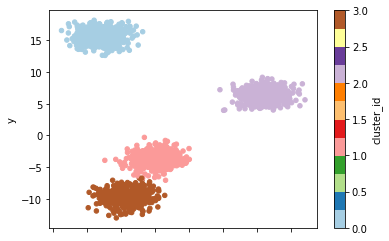

In [10]:
df.plot.scatter(x="x", y="y", c="cluster_id", cmap="Paired");

In [11]:
xbds = (df.x.min(), df.x.max())
ybds = (df.y.min(), df.y.max())

In [12]:
df_alt = pd.DataFrame({
    "x": xbds[0] + (xbds[1] - xbds[0]) * np.random.random(size=(1_000, )),
    "y": xbds[0] + (xbds[1] - xbds[0]) * np.random.random(size=(1_000, )),
})

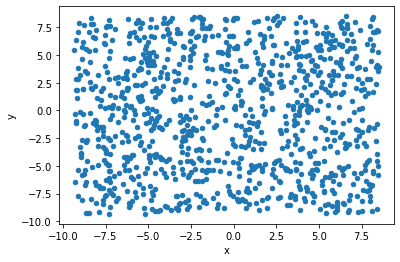

In [13]:
df_alt.plot.scatter(x="x", y="y")

In [14]:
df_alt["cluster_id"] = kmeans.predict(df_alt)

In [15]:
df_alt

,x,y,cluster_id
0,4.168864,7.945964,2
1,-4.626464,-0.932423,1
2,-2.296843,5.832759,2
3,0.909657,-2.803361,1
4,2.653356,-6.361313,1
...,...,...,...
995,-8.098303,5.438534,0
996,-0.094641,-2.597081,1
997,-5.470398,-3.148365,1
998,-4.563831,7.526544,0


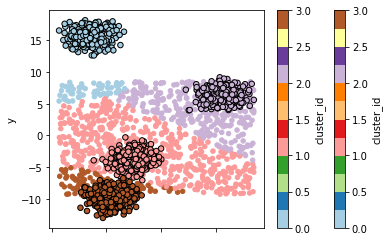

In [16]:
ax = df_alt.plot.scatter(x="x", y="y", c="cluster_id", cmap="Paired");
df.plot.scatter(x="x", y="y", c="cluster_id", s=30, edgecolor="k", cmap="Paired", ax=ax);

In [17]:
# df where each row = one position
# --> sequence of trajectories

# needs "distance" or metric between trajectories

In [18]:
dbs = sklearn.cluster.DBSCAN()
df["cluster_id_dbs"] = dbs.fit_predict(df[["x", "y"]])

In [19]:
from matplotlib import pyplot as plt

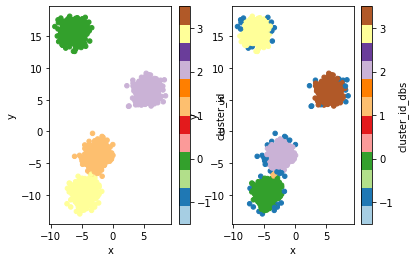

In [20]:
fig, ax = plt.subplots(1, 2)
df.plot.scatter(x="x", y="y", c="cluster_id", cmap="Paired", ax=ax[0], vmin=-1.5, vmax=3.5);
df.plot.scatter(x="x", y="y", c="cluster_id_dbs", cmap="Paired", ax=ax[1], vmin=-1.5, vmax=3.5);